## 1. Setup

In [1]:
import sys
sys.path.append('../..')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

from experiments.experiment_utils import *

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

## 2. ShanghaiTech (Part B)

In [4]:
dataset_name = 'shanghai_tech/part_b'
experiment_name = 'sigma_10_loss_mse_patch_16_256x256_epochs_50_lr_1e-4'
exp_path = f'./{dataset_name}/{experiment_name}/results/quantitative'

res_list = []
for res_path in sorted(os.listdir(exp_path)):
    csv_path = f'{exp_path}/{res_path}/results.csv'
    print(csv_path)
    res_df = pd.read_csv(csv_path, index_col=[3])
    res_list.append(res_df)

./shanghai_tech/part_b/sigma_10_loss_mse_patch_16_256x256_epochs_50_lr_1e-4/results/quantitative/epoch_01/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_patch_16_256x256_epochs_50_lr_1e-4/results/quantitative/epoch_02/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_patch_16_256x256_epochs_50_lr_1e-4/results/quantitative/epoch_03/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_patch_16_256x256_epochs_50_lr_1e-4/results/quantitative/epoch_04/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_patch_16_256x256_epochs_50_lr_1e-4/results/quantitative/epoch_05/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_patch_16_256x256_epochs_50_lr_1e-4/results/quantitative/epoch_06/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_patch_16_256x256_epochs_50_lr_1e-4/results/quantitative/epoch_07/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_patch_16_256x256_epochs_50_lr_1e-4/results/quantitative/epoch_08/results.csv
./shanghai_tech/part_b/sigma_10_loss_mse_patch_16_256x25

In [5]:
def get_results(res_list, metric='MAE', split='train'):
    r = []
    for res_df in res_list:
        value = res_df[metric][split]
        if metric in ['Underestimate', 'Overestimate', 'Difference']:
            value = float(value.split('%')[0])
        r.append(value)
    
    return r

print(get_results(res_list, metric='MAE', split='train'))
print(get_results(res_list, metric='MAE', split='val'))
print(get_results(res_list, metric='MAE', split='test'))
print(get_results(res_list, metric='Difference', split='test'))

val_mae = get_results(res_list, metric='MAE', split='val')
test_mae = get_results(res_list, metric='MAE', split='test')
best_epoch = np.argmin(val_mae)

print(f'epoch: {best_epoch + 1},  val_mae: {val_mae[best_epoch]}')
print(f'epoch: {best_epoch + 1}, test_mae: {test_mae[best_epoch]}')

[69.369, 49.325, 45.913999999999994, 57.794, 54.31100000000001, 73.132, 34.077, 79.096, 50.192, 119.698, 38.616, 29.734, 40.275999999999996, 32.329, 43.397, 27.006999999999998, 38.109, 29.12, 58.261, 40.228, 29.855999999999998, 41.43899999999999, 35.2, 21.529, 31.753, 28.984, 22.034000000000002, 19.329, 47.042, 72.37100000000001, 20.518, 29.451, 17.941, 49.163000000000004, 58.398999999999994, 31.383000000000003, 30.049, 25.374000000000002, 35.251999999999995, 32.974000000000004, 26.193, 16.629, 23.243000000000002, 16.576, 22.128, 24.462, 33.186, 31.908, 27.07, 16.221]
[63.85, 43.763000000000005, 42.214, 53.717, 48.693999999999996, 66.87100000000001, 29.125, 75.405, 45.957, 114.67399999999999, 31.973000000000003, 25.796999999999997, 35.734, 30.651, 41.967, 25.281, 33.467, 26.678, 58.681000000000004, 37.681, 25.636999999999997, 39.113, 30.971999999999998, 19.281, 31.764, 28.324, 20.918000000000003, 18.997, 40.39, 65.572, 19.677, 27.995, 17.734, 49.09, 63.254, 30.314, 30.004, 23.291999999

In [6]:
def plot_results(res_list, metric='', new_figure=True):
    train_res = get_results(res_list, metric=metric, split='train')
    val_res = get_results(res_list, metric=metric, split='val')
    test_res = get_results(res_list, metric=metric, split='test')
    
    if new_figure:
        plt.figure()
    
    plt.title(metric)
    epochs = (1 + np.arange(len(train_res)))
    plt.plot(epochs, train_res, label='train')
    plt.plot(epochs, val_res, label='val')
    plt.plot(epochs, test_res, label='test')
    plt.legend()

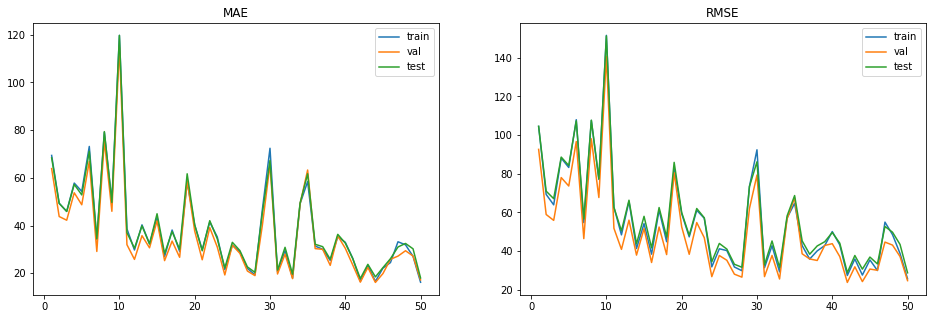

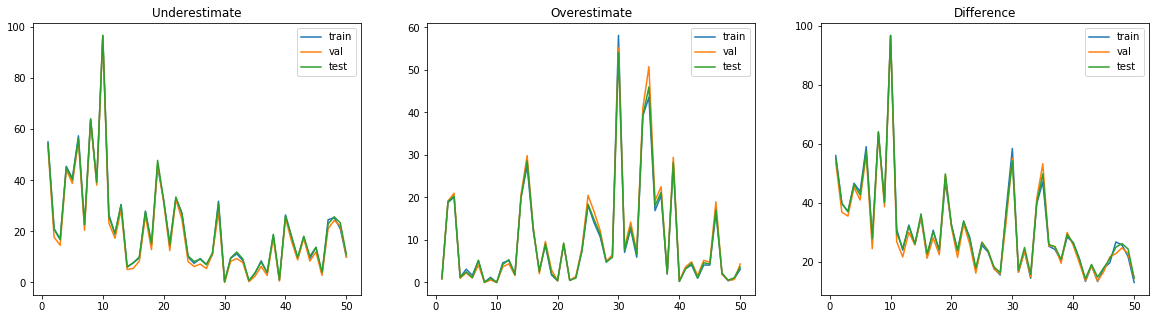

In [7]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plot_results(res_list, metric='MAE', new_figure=False)
plt.subplot(1, 2, 2)
plot_results(res_list, metric='RMSE', new_figure=False)

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plot_results(res_list, metric='Underestimate', new_figure=False)
plt.subplot(1, 3, 2)
plot_results(res_list, metric='Overestimate', new_figure=False)
plt.subplot(1, 3, 3)
plot_results(res_list, metric='Difference', new_figure=False)